In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
data = pd.read_excel("student database final.xlsx")

# -----------------------------
# 2️⃣ At Risk Identification
# -----------------------------
data['at_risk'] = (
    (data['attendance_percentage'] < 75) |
    (data['internal_marks'] < 40) |
    (data['study_hours_per_week'] < 10)
)

# -----------------------------
# 3️⃣ Predicted Final Score
# -----------------------------
data['predicted_score'] = (
    0.4 * data['internal_marks'] +
    0.3 * data['assignment_marks'] +
    0.3 * data['past_semester_percentage']
)

# -----------------------------
# 4️⃣ Grade System
# -----------------------------
def grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"

data['grade'] = data['predicted_score'].apply(grade)

# -----------------------------
# 5️⃣ Show First 5 Records
# -----------------------------
print(data.head())

# -----------------------------
# 6️⃣ At Risk Count
# -----------------------------
print("\nAt Risk Students Count:")
print(data['at_risk'].value_counts())

# -----------------------------
# 7️⃣ Grade Distribution Graph
# -----------------------------
data['grade'].value_counts().plot(kind='bar')
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'student database final.xlsx'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student database final.xlsx to student database final.xlsx


In [ ]:
import os
print(os.listdir())

['.config', 'student database final.xlsx', 'sample_data']


In [ ]:
import pandas as pd

data = pd.read_excel("student database final.xlsx")
print(data.head())

  student_id        name department  past_semester_percentage  \
0     S00001  RAJAPRIYAN       MECH                      0.95   
1     S00002        DIYA         IT                      0.65   
2     S00003      VIKRAM       MECH                      0.78   
3     S00004       MEERA        CSE                      0.97   
4     S00005        SUGI        EEE                      0.85   

   attendance_percentage  study_hours_per_week  final_marks  internal_marks  
0                     88                    18           85              42  
1                     94                    24           92              47  
2                     76                    14           72              36  
3                     81                    16           78              39  
4                     85                    19           83              41  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features & Target
X = data[['past_semester_percentage', 'attendance_percentage', 'study_hours_per_week', 'internal_marks']]
y = data['final_marks']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Check score
print("R2 Score:", model.score(X_test, y_test))

R2 Score: 0.9940312974458556


In [ ]:
student_id = "S00002"  # Unga valid ID podunga

student_data = data[data['student_id'] == student_id]
X_new = student_data[['past_semester_percentage','attendance_percentage','study_hours_per_week','internal_marks']]

predicted_mark = model.predict(X_new)

print("Student Name:", student_data['name'].values[0])
print("Actual Final Mark:", student_data['final_marks'].values[0])
print("Predicted Final Mark:", predicted_mark[0])

Student Name: DIYA
Actual Final Mark: 92
Predicted Final Mark: 92.46948877445894


In [ ]:
data['Predicted_Marks'] = model.predict(X)
data['Risk_Status'] = data['Predicted_Marks'].apply(lambda x: "At Risk" if x < 50 else "Safe")

print(data[['student_id','name','Predicted_Marks','Risk_Status']])

   student_id          name  Predicted_Marks Risk_Status
0      S00001    RAJAPRIYAN        84.738805        Safe
1      S00002          DIYA        92.469489        Safe
2      S00003        VIKRAM        73.261970        Safe
3      S00004         MEERA        78.257900        Safe
4      S00005          SUGI        82.419842        Safe
5      S00006      KARTHIKA        88.234398        Safe
6      S00007         ARJUN        67.477039        Safe
7      S00008         KAVYA        90.453718        Safe
8      S00009        ADITYA        75.379516        Safe
9      S00010         PRIYA        87.040226        Safe
10     S00011  MONESH KUMAR        71.185770        Safe
11     S00012   KARTHIKEYAN        95.062971        Safe
12     S00013      KAMALESH        79.751827        Safe
13     S00014         MOHAN        88.543694        Safe
14     S00015         KARAN        69.461006        Safe
15     S00016         DIVYA        92.736055        Safe
16     S00017        YOGESH    

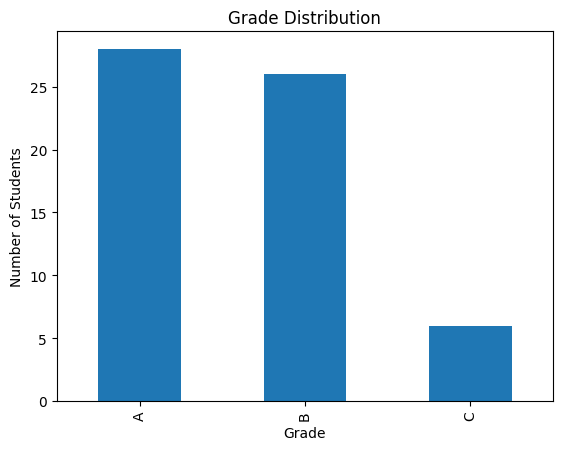

In [ ]:
def grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"

data['grade'] = data['Predicted_Marks'].apply(grade)

# Grade distribution
import matplotlib.pyplot as plt
data['grade'].value_counts().plot(kind='bar')
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()